# Vue interactomique de l'action des MiRNA sur un jeu de gènes impliqués dans une maladie et dans un tissu spécifique

## Librairies

In [1]:
%pip install networkx==2.7
%pip install scipy==2.6.3
%pip install scipy==1.8 

from fa2 import ForceAtlas2
import pandas as pd
import requests
import networkx as nx
import json
import matplotlib.pyplot as plt
from google.colab import drive
from matplotlib.lines import Line2D
from google.colab import files
drive.mount('/content/gdrive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 7.3 MB/s 
  Attempting uninstall: networkx
    Found existing installation: networkx 2.8.8
    Uninstalling networkx-2.8.8:
      Successfully uninstalled networkx-2.8.8
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement scipy==2.6.3 (from versions: 0.8.0, 0.9.0, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.12.1, 0.13.0, 0.13.1, 0.13.2, 0.13.3, 0.14.0, 0.14.1, 0.15.0, 0.15.1, 0.16.0, 0.16.1, 0.17.0, 0.17.1, 0.18.0, 0.18.1, 0.19.0, 0.19.1, 1.0.0, 1.0.1, 1.1.0, 1.2.0, 1.2.1, 1.2.2, 1.2.3, 1.3.0rc1, 1.3.0rc2, 1.3.0, 1.3.1, 1.3.2, 1.3.3, 1.4.0rc1, 1.4.0rc2, 1.4.0, 1.4.1, 1.5.0rc1, 1.5.0rc2, 1.5.0, 1.5.1, 1.5.2, 1.5.3, 1.5.4, 1.6.0rc1, 1.6.0rc2, 1.6.0, 1.6.1, 1.6.2, 1.6.3, 1.7.0rc1, 1.7.0rc2, 1.7.0, 1.7.1, 1.7.2, 1.7.3, 1.8.0rc1, 1.8.0rc2, 1.8.0rc3,

In [2]:
! scipy.__version__

/bin/bash: scipy.__version__: command not found


## Paramètres à spécifier par l'utilisateur

### Choix de travailler avec une liste de gènnes ou les gènes d'une maladie extraits d'une base de donnée

In [9]:
#Si vous souhaitez travailler avec votre propre liste de gènes saisir 1 sinon 0
choix=0
#Si votre choix=1, écrire  votre liste de gènes dans le fichier "genes.txt"
list_gene=[]
with open("/content/gdrive/MyDrive/genes.txt","r") as f:
  for l in f.readlines():
    list_gene.append(l[:-1])

### Choix du tissus

In [16]:

options = ['Adipose_Subcutaneous', 'Adipose_Visceral_Omentum', 'Adrenal_Gland', 'Artery_Aorta', 'Artery_Coronary', 'Artery_Tibial','Bladder', 
           'Brain_Amygdala' ,'Brain_Anterior_cingulate_cortex_BA24', 'Brain_Caudate_basal_ganglia', 'Brain_Cerebellar_Hemisphere', 'Brain_Cerebellum',
           'Brain_Cortex' ,'Brain_Frontal_Cortex_BA9', 'Brain_Hippocampus', 'Brain_Hypothalamus', 'Brain_Nucleus_accumbens_basal_ganglia', 'Brain_Putamen_basal_ganglia',
           'Brain_Spinal_cord_cervical_c-1' ,'Brain_Substantia_nigra', 'Breast_Mammary_Tissue' ,'Cells_Cultured_fibroblasts' ,'Cells_EBV-transformed_lymphocytes', 'Cells_Transformed_fibroblasts' ,'Cervix_Ectocervix',
           'Cervix_Endocervix', 'Colon_Sigmoid' ,'Colon_Transverse', 'Esophagus_Gastroesophageal_Junction', 'Esophagus_Mucosa', 'Esophagus_Muscularis', 'Fallopian_Tube', 'Heart_Atrial_Appendage', 'Heart_Left_Ventricle',
           'Kidney_Cortex', 'Liver' 'Lung', 'Minor_Salivary_Gland', 'Muscle_Skeletal', 'Nerve_Tibial', 'Ovary', 'Pancreas', 'Pituitary', 'Prostate', 'Skin_Not_Sun_Exposed_Suprapubic', 'Skin_Sun_Exposed_Lower_leg',
           'Small_Intestine_Terminal_Ileum', 'Spleen', 'Stomach', 'Testis', 'Thyroid', 'Uterus', 'Vagina', 'Whole_Blood']

tissue = ''
while tissue not in options:
  for index, item in enumerate(options):
    print(f'{index+1}) {item}\n')

  tissue = options[int(input("Choisir un numéro"))-1]
  if tissue in options:
    print('You picked: ' + tissue)

1) Adipose_Subcutaneous

2) Adipose_Visceral_Omentum

3) Adrenal_Gland

4) Artery_Aorta

5) Artery_Coronary

6) Artery_Tibial

7) Bladder

8) Brain_Amygdala

9) Brain_Anterior_cingulate_cortex_BA24

10) Brain_Caudate_basal_ganglia

11) Brain_Cerebellar_Hemisphere

12) Brain_Cerebellum

13) Brain_Cortex

14) Brain_Frontal_Cortex_BA9

15) Brain_Hippocampus

16) Brain_Hypothalamus

17) Brain_Nucleus_accumbens_basal_ganglia

18) Brain_Putamen_basal_ganglia

19) Brain_Spinal_cord_cervical_c-1

20) Brain_Substantia_nigra

21) Breast_Mammary_Tissue

22) Cells_Cultured_fibroblasts

23) Cells_EBV-transformed_lymphocytes

24) Cells_Transformed_fibroblasts

25) Cervix_Ectocervix

26) Cervix_Endocervix

27) Colon_Sigmoid

28) Colon_Transverse

29) Esophagus_Gastroesophageal_Junction

30) Esophagus_Mucosa

31) Esophagus_Muscularis

32) Fallopian_Tube

33) Heart_Atrial_Appendage

34) Heart_Left_Ventricle

35) Kidney_Cortex

36) LiverLung

37) Minor_Salivary_Gland

38) Muscle_Skeletal

39) Nerve_Tibi

### Choix du nombre de gène à sélectionner au sein du tissus

In [30]:
nb_gene_tissu=500

### Choix de la maladie à étudier

In [18]:
#Saisir le DOID de la maladie étudiée
disease="0050451"
#Nombre de gène maximale impliqués dans la maladie
nb_gene_disease=500

## Récupération des données

### Liste de gène les plus exprimés dans le tissu (base de donne: Alliancegenome)

In [68]:
#Get the gene present in the tissu

option="true"
nb_gene="1000"
url = "https://gtexportal.org/rest/v1/expression/topExpressedGene?datasetId=gtex_v8&tissueSiteDetailId="+ tissue +"&filterMtGene="+option+"true&sortBy=median&sortDirection=desc&pageSize="+ nb_gene + "&format=json"
res = requests.get(url)
data =res.json()
list_expressed_gene=[]
for i in data["topExpressedGene"]:
    list_expressed_gene.append(i["geneSymbol"])


### Liste de gènes impliqués dans la maladie

In [11]:
#Get the gene which are involved in the disease
list_disease=[]
url = "https://www.alliancegenome.org/api/disease/DOID%3A"+disease+"/genes?asc=TRUE&limit="+str(nb_gene_disease)
res = requests.get(url)
data = res.json()
for i in data["results"] :
  if i['gene']['species']['name'] == 'Homo sapiens' : 
    if i["gene"]["symbol"] not in list_disease:
      list_disease.append(i['gene']['symbol'])

print("Il y a ",len(list_disease)," gènes impliqués dans la maladies")
for g in list_disease:
  print("* ",g)

Il y a  9  gènes impliqués dans la maladies
*  CACNA1C
*  CACNB2
*  GPD1L
*  HCN4
*  KCND3
*  KCNE3
*  SCN1B
*  SCN3B
*  SCN5A


### Liste des intéractions miRNA/target 

In [32]:
#Get the mirna in interaction with the gene in list_disease
f_json=open("/content/gdrive/MyDrive/mirna.json","r")
dico_target=json.loads(f_json.read())

## Fonctions

In [59]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [33]:
# réglage de l'algorithme force Atlas
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=1,
                        strongGravityMode=False,
                        gravity=2,

                        # Log
                        verbose=True)


## Création du graph représentant l'ensemble des interactions miRNA/genes_maladies/genes_tissu

In [96]:
G=nx.read_gexf("/content/gdrive/MyDrive/interactome.gexf")

G1=nx.Graph()
edge_colormap=[]
list_mirna_g1=[]
if choix==0:
  target=list_disease
else:
  target=list_gene

#Add node  for gene involved in the disease and the mirna associated
for d in target:
    G1.add_node(d)    
    if d in dico_target.keys():
        for v in dico_target[d]:
                list_mirna_g1.append(v[7:])
                G1.add_node(v[7:])
                G1.add_edge(v[7:],d,weight=1)
                #edge_colormap.append("orange")

# Add nodes for the gene in interaction with the genes involved in the disease if they are expressed in the tissu
nodes=list(G1.nodes()).copy()

for n in nodes:
    if n in G.nodes():
        for n1 in G.neighbors(n):
            if (n1 in list_expressed_gene and len(intersection(G.neighbors(n1),nodes))>1) or (n1 in target) or (n1 in list_expressed_gene and len(intersection(G.neighbors(n1),list_mirna_g1))>0):
                if n1 not in G1.nodes():
                    G1.add_node(n1)
                G1.add_edge(n,n1,weight=0)
                #edge_colormap.append("purple")
#Add nodes for mirna associated with these genes 
                if n1 in dico_target.keys():
                    for v in dico_target[n1]:
                        if v[7:] in G1.nodes():
                          G1.add_edge(n1,v[7:],weight=1)
                        #edge_colormap.append("orange")


In [97]:
# colorier les arêtes selon l'interaction des nœuds
edge_colormap=[]
for e in G1.edges():
    if G1[e[0]][e[1]]["weight"]==1:
      edge_colormap.append("orange")
    else:
      edge_colormap.append("gray")


In [98]:
# colorier les gène impliqué dans la maladie en rouge les gènes exprimés dans le tissu en vert et les miRNA en vert
color_map=[]
for n in G1.nodes():
    if n in target:
        color_map.append("red")
    elif n in list_expressed_gene:
        color_map.append("blue")
    else:
        color_map.append("green")

In [99]:
# la taille des nœuds est proportionnelle au degré de connexion
size_map=[]
for n in G1.nodes():
    c=0
    for n1 in G1.neighbors(n):
        c+=1
    size_map.append(max(350,c*115))

In [100]:
dict_degree=G1.degree

In [101]:
# la taille de leur label est proportionnelle au degré de connexion
fontsize_map=[]
for n in G1.nodes():
    c=0
    for n1 in G1.neighbors(n):
        c+=1
    fontsize_map.append(max(7,c*2))

100%|██████████| 3000/3000 [00:02<00:00, 1146.71it/s]


BarnesHut Approximation  took  0.64  seconds
Repulsion forces  took  1.53  seconds
Gravitational forces  took  0.03  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.17  seconds


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

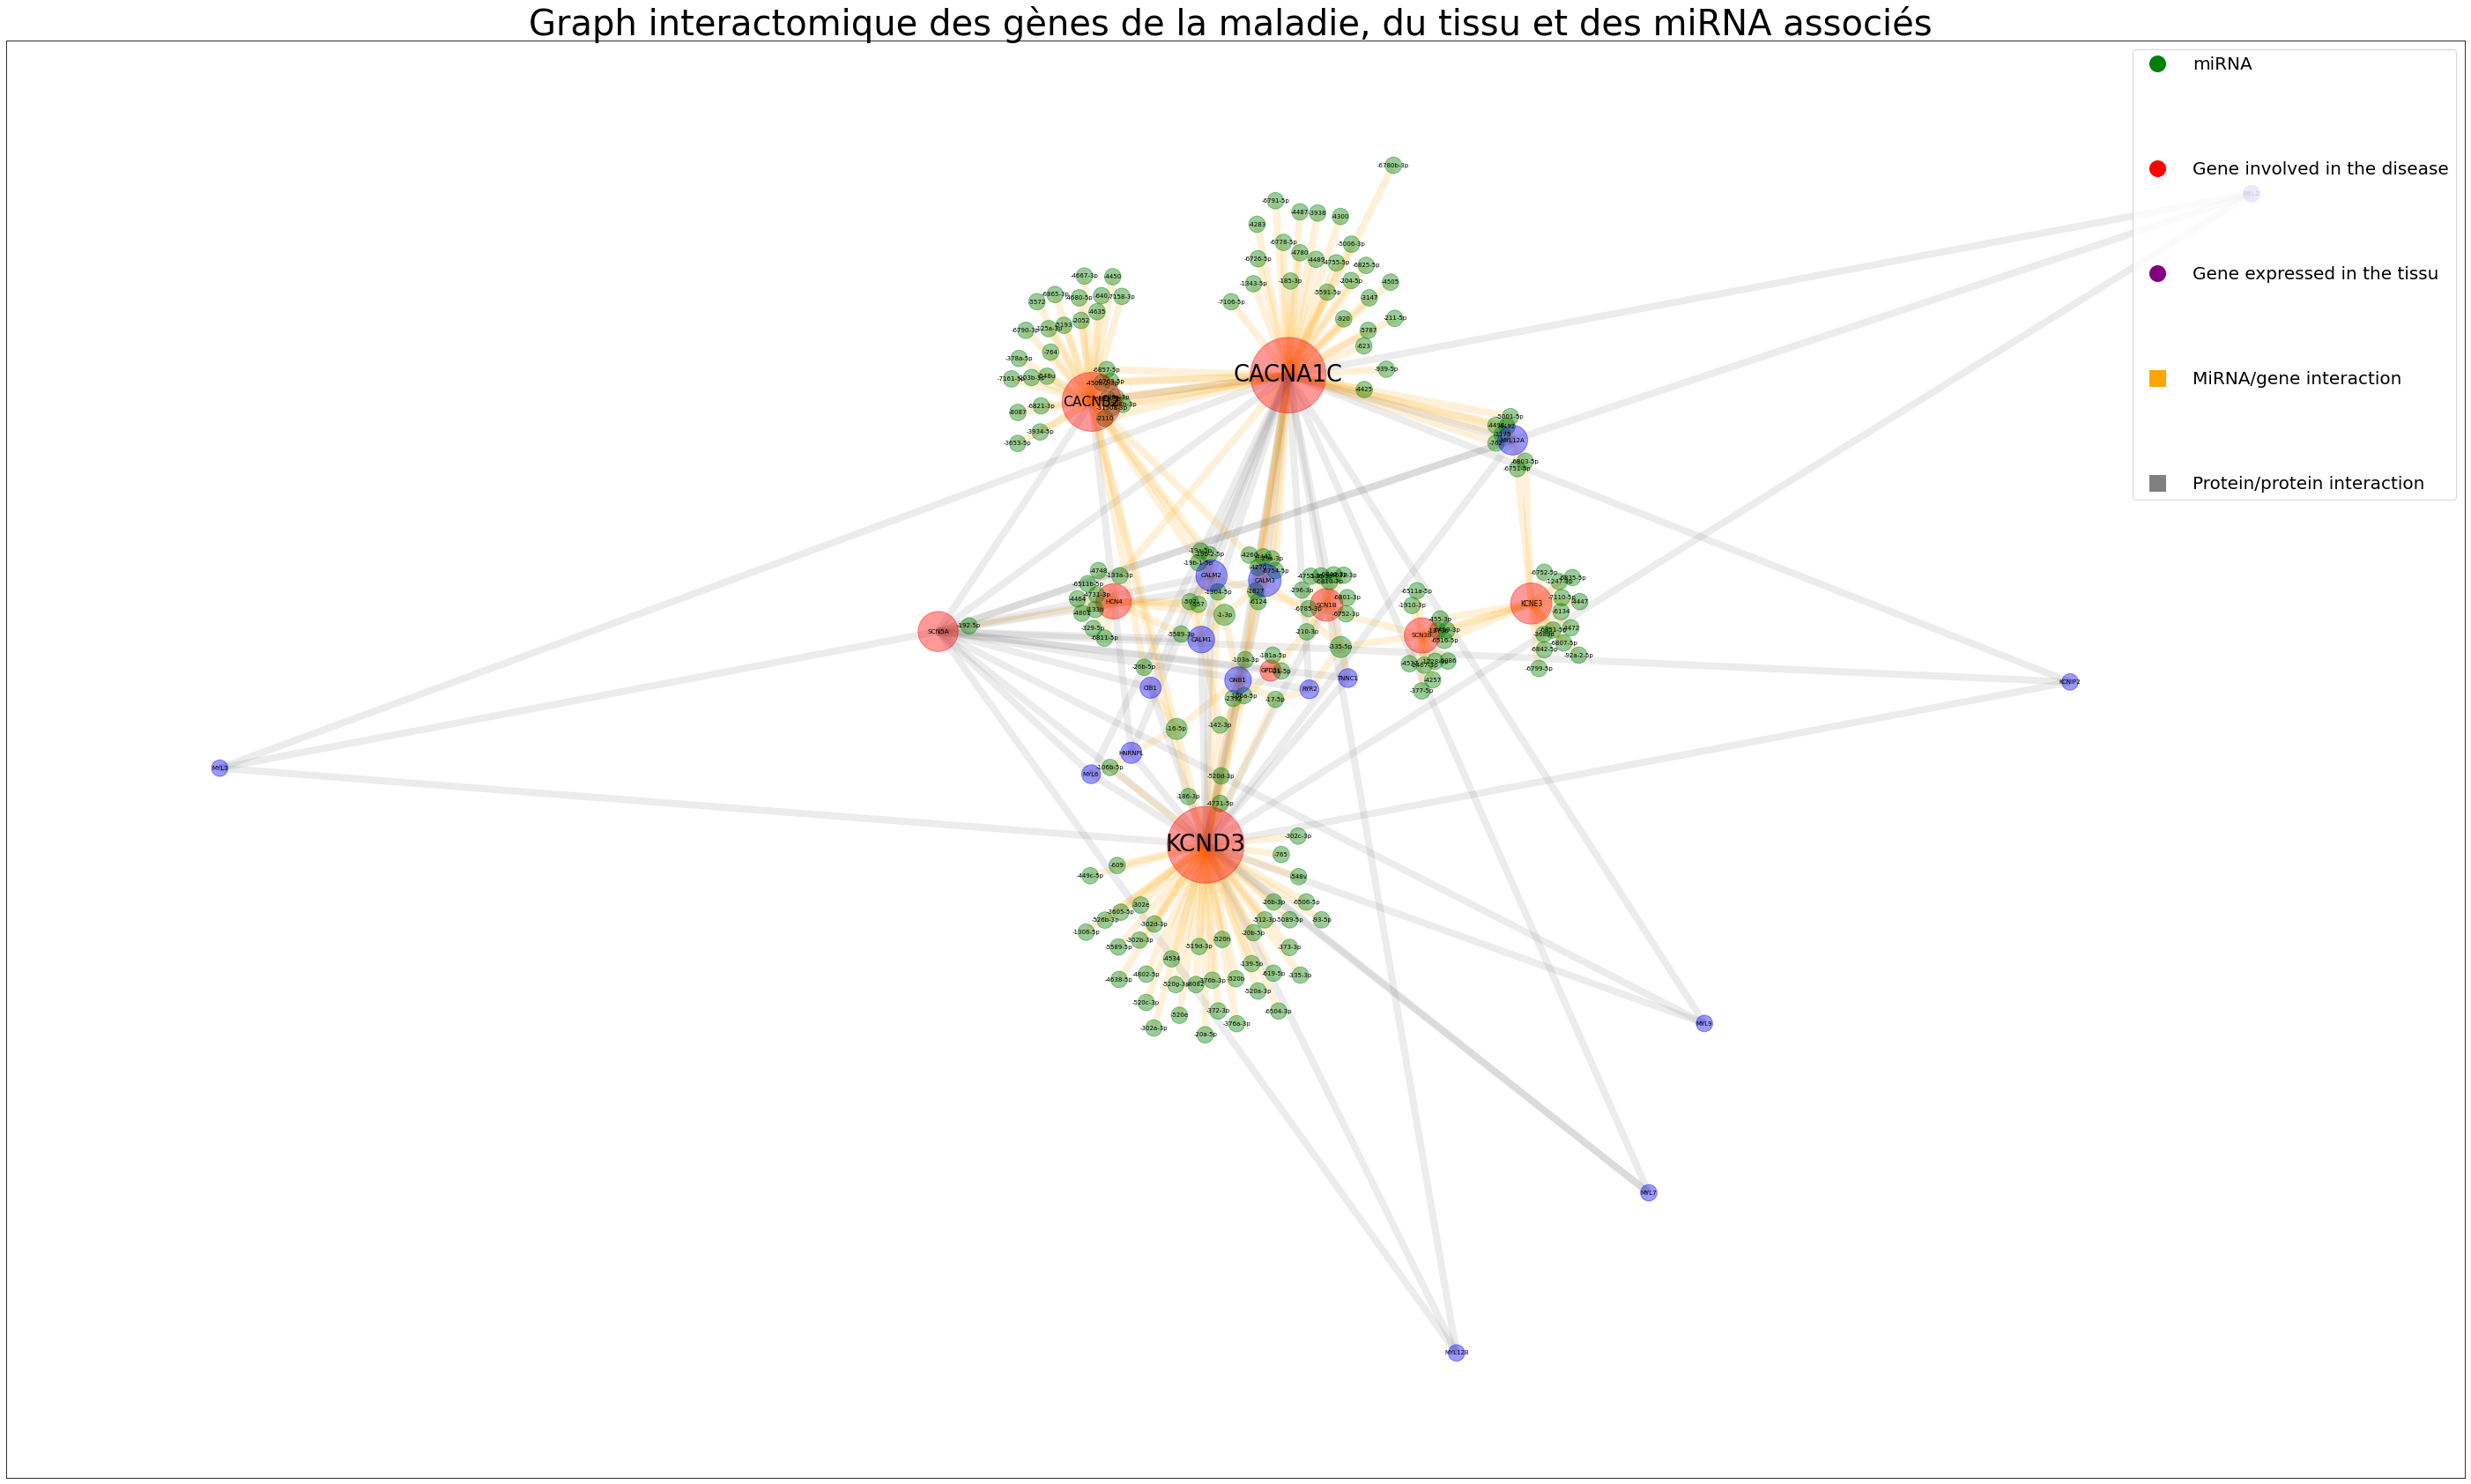

In [102]:
# construction du graphe avec légende
fig=plt.figure(1, figsize=(50,30))
positions = forceatlas2.forceatlas2_networkx_layout(G1, pos=None, iterations=3000)
nodes=nx.draw_networkx_nodes(G1, positions, node_size=size_map, node_color=color_map, alpha=0.4)
edges=nx.draw_networkx_edges(G1, positions, edge_color=edge_colormap, alpha=0.15,width=8)
#nx.draw_networkx_labels(G1,positions,bbox=dict(facecolor="white", edgecolor='blue', boxstyle='round,pad=0.2'),font_size=7)

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='miRNA',markerfacecolor='g', markersize=20),
    Line2D([0], [0], marker='o', color='w', label='Gene involved in the disease',markerfacecolor='r', markersize=20),
    Line2D([0], [0], marker='o', color='w', label='Gene expressed in the tissu',markerfacecolor='purple', markersize=20),        
    Line2D([0], [0], marker='s', color='w', label='MiRNA/gene interaction',markerfacecolor='orange', markersize=20),      
    Line2D([0], [0], marker='s', color='w', label='Protein/protein interaction',markerfacecolor='gray', markersize=20),        
]


for node, (x, y) in positions.items():
    plt.text(x, y, node, fontsize=max(7,dict_degree[node]*0.4), ha='center', va='center')
plt.sci(edges)
plt.sci(nodes)
plt.title("Graph interactomique des gènes de la maladie, du tissu et des miRNA associés ",fontsize=40)
plt.legend(handles=legend_elements, loc='upper right',labelspacing=5,handletextpad=1,fontsize=20)
plt.savefig("graph.pdf")
files.download("graph.pdf")

plt.show()

## Création d'un sous graph représentant les interactions d'un noeud 

In [87]:
#Saisir le noeud à étudier
node="SCN5A"

100%|██████████| 4000/4000 [00:01<00:00, 2609.96it/s]


BarnesHut Approximation  took  0.36  seconds
Repulsion forces  took  0.84  seconds
Gravitational forces  took  0.02  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.13  seconds


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

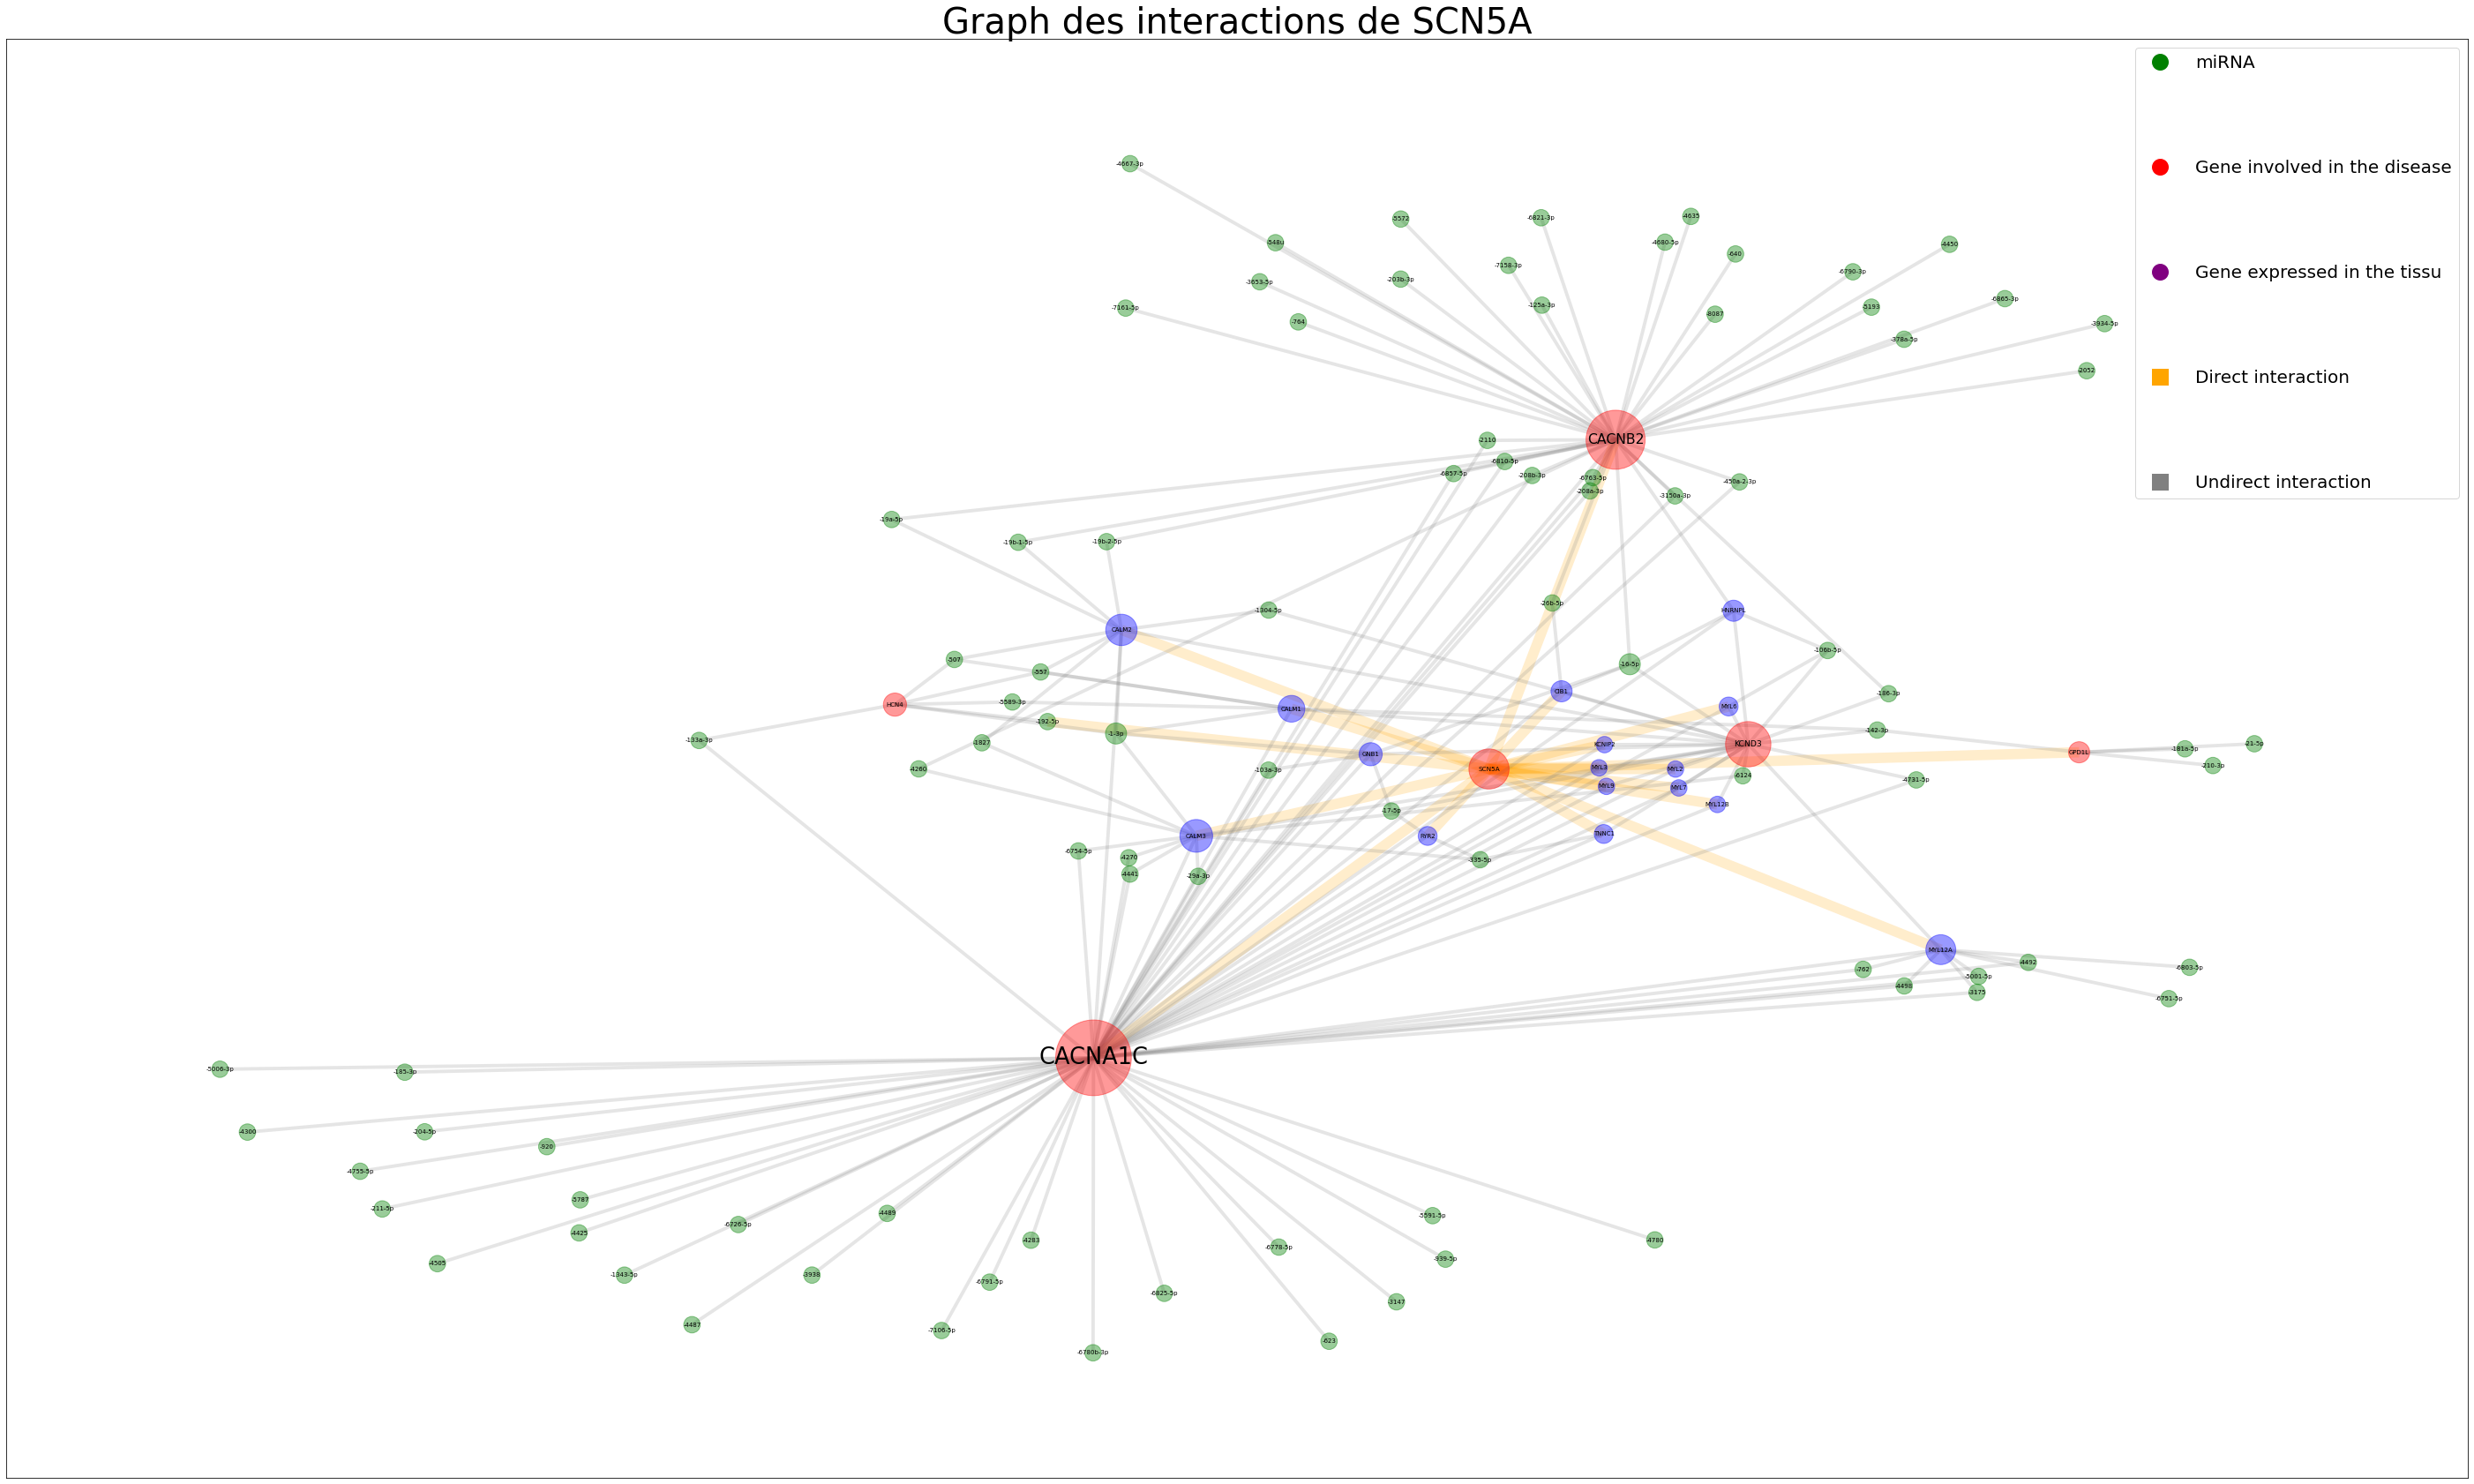

In [88]:
# construction du graphe avec le nœud à étudier ses voisins et les voisins des voisins
G2=nx.Graph()
G2.add_node(node)
for n in G1.neighbors(node):
    G2.add_node(n)
    G2.add_edge(n,node,weight=9)
    for n1 in G1.neighbors(n):
        if n1 not in G2.nodes():
            G2.add_node(n1)
            G2.add_edge(n1,n,weight=3)
for n in G2.nodes():
    for n1 in G2.nodes():
        if n1  in G1.neighbors(n) and (n,n1) not in G2.edges() :
            G2.add_edge(n,n1,weight=3)
degre=G2.degree
color_map=[]
for n in G2.nodes():
    if n in target:
        color_map.append("red")
    elif n in list_expressed_gene:
        color_map.append("blue")
    else:
        color_map.append("green")
    
weights = [G2[u][v]['weight'] for u,v in G2.edges()]
edgecolor_map=[]
for e  in G2.edges():
    if G2[e[0]][e[1]]["weight"]==9:
        edgecolor_map.append("orange")
    else:
      edgecolor_map.append("gray")   

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='miRNA',markerfacecolor='g', markersize=20),
    Line2D([0], [0], marker='o', color='w', label='Gene involved in the disease',markerfacecolor='r', markersize=20),
    Line2D([0], [0], marker='o', color='w', label='Gene expressed in the tissu',markerfacecolor='purple', markersize=20),        
    Line2D([0], [0], marker='s', color='w', label='Direct interaction',markerfacecolor='orange', markersize=20),      
    Line2D([0], [0], marker='s', color='w', label='Undirect interaction',markerfacecolor='gray', markersize=20),        
]


fig=plt.figure(1, figsize=(50,30))
positions = forceatlas2.forceatlas2_networkx_layout(G2, pos=None, iterations=4000)
nodes=nx.draw_networkx_nodes(G2, positions, node_size=[max(350,degre[k]*115)for k in G2.nodes()], node_color=color_map, alpha=0.4)
edges=nx.draw_networkx_edges(G2, positions, edge_color=edgecolor_map, alpha=0.2,width=[k*1.3 for k in weights])
#nx.draw_networkx_labels(G1,positions,bbox=dict(facecolor="white", edgecolor='blue', boxstyle='round,pad=0.2'),font_size=7)

for n, (x, y) in positions.items():
    plt.text(x, y, n, fontsize=max(7,degre[n]*0.4), ha='center', va='center')
plt.sci(edges)
plt.sci(nodes)
plt.title(f"Graph des interactions de {node}",fontsize=40)
plt.legend(handles=legend_elements, loc='upper right',labelspacing=5,handletextpad=1,fontsize=20)
plt.savefig(f"{node}.pdf")
files.download(f"{node}.pdf")

plt.show()


## Chiffres

###  Classement selon le degré de connection

In [78]:
# classement des MIRNA selon leur degré
dico_mirnaa_deg={}
for n in G1.nodes():
    if n[:1]=="-":
        dico_mirnaa_deg[n]=len(list(G1.neighbors(n)))
df_deg_mi_all=pd.DataFrame.from_dict(dico_mirnaa_deg,orient="index",columns=["degree_mirna_all"])
df_deg_mi_all=df_deg_mi_all.sort_values(by=["degree_mirna_all"],ascending=False)
df_deg_mi_all.head()



,degree_mirna_all
-1-3p,5
-16-5p,5
-335-5p,5
-1827,3
-557,3


In [79]:
# classement des mirna selon leur connexion avec des gènes impliqués dans la maladie
dico_mirnaa_deg={}
for n in G1.nodes():
    if n[:1]=="-":
        c=0
        for n1 in list(G1.neighbors(n)):
            if n1 in target:
                c+=1
        dico_mirnaa_deg[n]=c
df_deg_mi_dis=pd.DataFrame.from_dict(dico_mirnaa_deg,orient="index",columns=["degre_mirna_disease"])
df_deg_mi_dis=df_deg_mi_dis.sort_values(by=["degre_mirna_disease"],ascending=False)
df_deg_mi_dis.head()

,degre_mirna_disease
-133a-3p,2
-6810-5p,2
-192-5p,2
-142-3p,2
-210-3p,2


In [80]:
# classement des genes de la maladie selon leur degré
dico_deg={}
for n in G1.nodes():
    if n in target:
        dico_deg[n]=len(list(G1.neighbors(n)))
df_deg_gene_all=pd.DataFrame.from_dict(dico_deg,orient="index",columns=["degree_gene_all"])
df_deg_gene_all=df_deg_gene_all.sort_values(by=["degree_gene_all"],ascending=False)
df_deg_gene_all.head()

,degree_gene_all
KCND3,65
CACNA1C,64
CACNB2,39
KCNE3,19
SCN5A,18


In [81]:
# classement des gènes selon leur connexion avec des mirna
dico_deg={}
for n in G1.nodes():
    if n in target:
        c=0
        for n1 in list(G1.neighbors(n)):
            if n1[0]=="-":
                c+=1
        dico_deg[n]=c
df_deg_gene_dis=pd.DataFrame.from_dict(dico_deg,orient="index",columns=["degree_gene_mirna"])
df_deg_gene_dis=df_deg_gene_dis.sort_values(by=["degree_gene_mirna"],ascending=False)
df_deg_gene_dis.head()

,degree_gene_mirna
KCND3,50
CACNA1C,46
CACNB2,36
KCNE3,19
HCN4,14


### Combien de MiRNA faut-il pour réguler tous les gènes de la maladie ? 

In [82]:
# trouver le nombre de mirena minimum
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

dico_mir_top={}
list_already=[]
for i in list(df_deg_mi_dis.index):
    for n in intersection(list(G1.neighbors(i)),target):
          if n not in list_already:
              list_already.append(n)
              if i not in dico_mir_top.keys():
                dico_mir_top[i]=[]
              dico_mir_top[i].append(n)

              if len(list_already)==len(target):
                break
              
print("Il faut ",len(dico_mir_top.keys()),"miRNA pour réguler ",len(list_already),"gènes sur les ",len(target)," gènes impliqués dans la maladie ")
for mi in dico_mir_top.keys():
    print("* ","hsa-miR"+mi,": ",dico_mir_top[mi])


Il faut  6 miRNA pour réguler  9 gènes sur les  9  gènes impliqués dans la maladie 
*  hsa-miR-133a-3p :  ['CACNA1C', 'HCN4']
*  hsa-miR-6810-5p :  ['CACNB2']
*  hsa-miR-192-5p :  ['SCN5A']
*  hsa-miR-142-3p :  ['GPD1L', 'KCND3']
*  hsa-miR-210-3p :  ['SCN1B']
*  hsa-miR-6516-5p :  ['KCNE3', 'SCN3B']


100%|██████████| 4000/4000 [00:00<00:00, 27080.51it/s]


BarnesHut Approximation  took  0.04  seconds
Repulsion forces  took  0.04  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

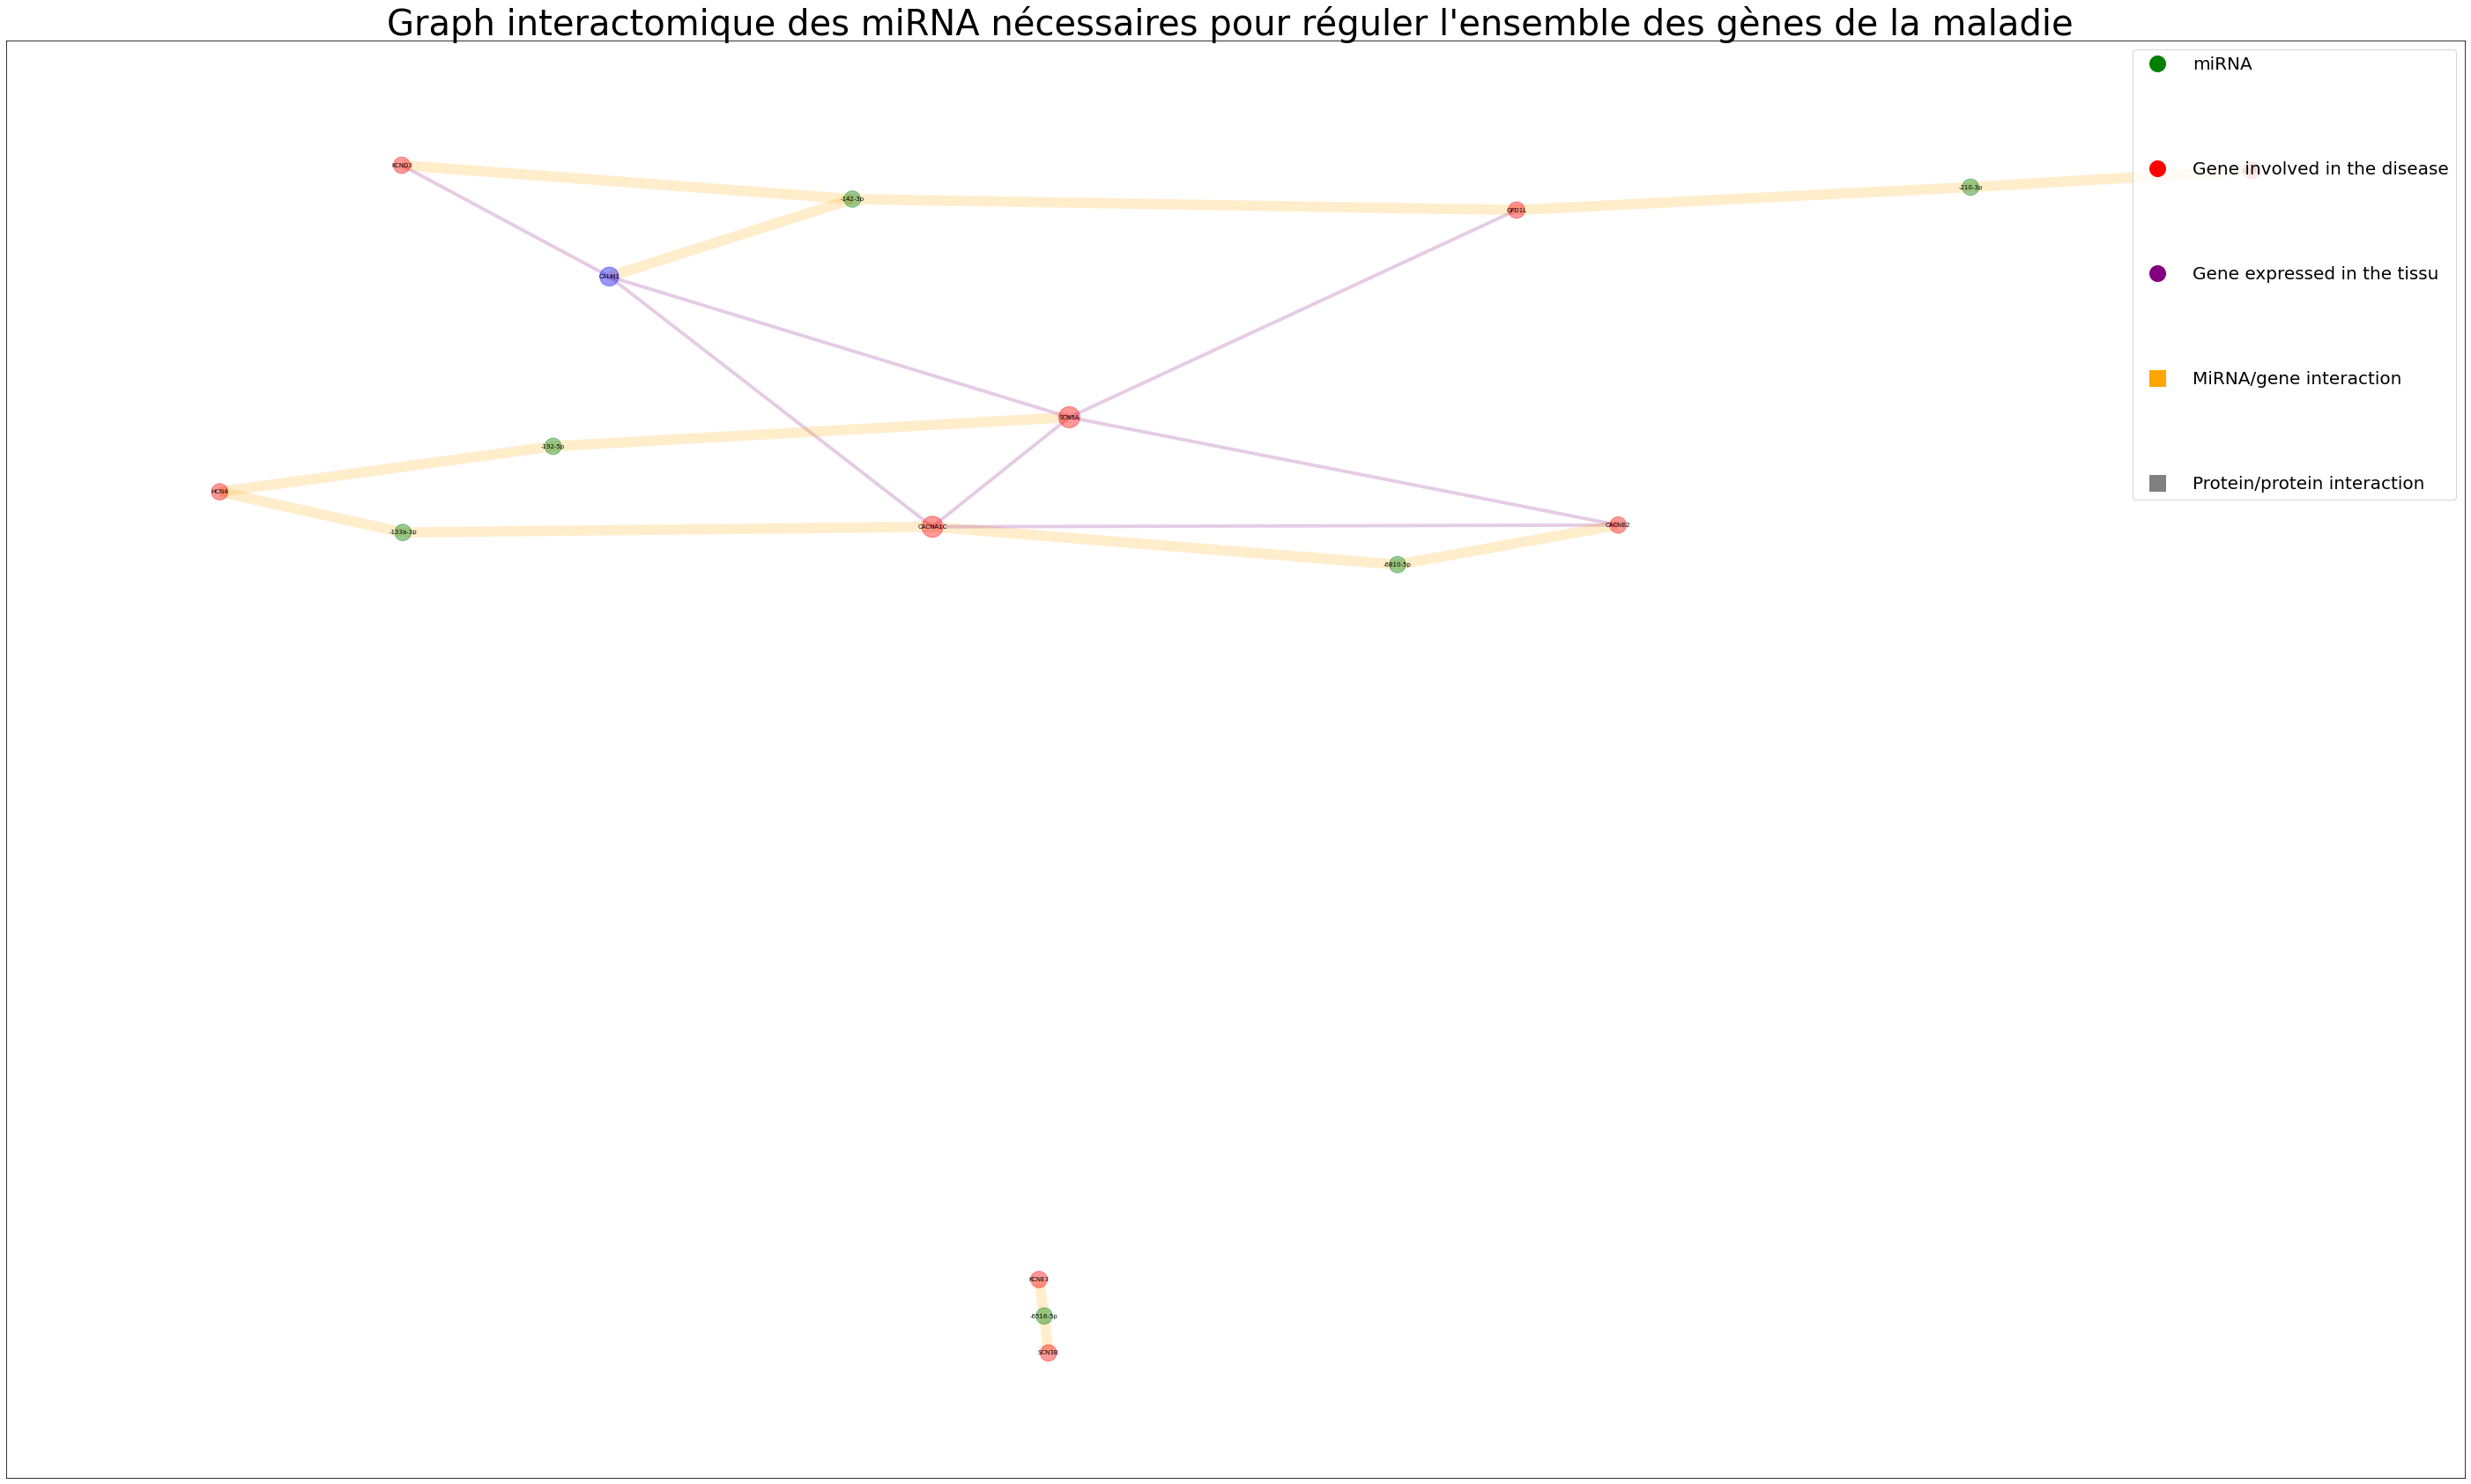

In [83]:
# construction du graphe avec le minimum de miRNA pour réguler l'ensemble des gènes de la maladie
G2=nx.Graph()
for n in dico_mir_top.keys():
  G2.add_node(n)
  for n2 in G1.neighbors(n):
    G2.add_node(n2)
    G2.add_edge(n,n2,weight=9)

for n in G2.nodes():
    for n1 in G2.nodes():
        if n1  in G1.neighbors(n) and (n,n1) not in G2.edges() :
            G2.add_edge(n,n1,weight=3)
degre=G2.degree
color_map=[]
for n in G2.nodes():
    if n in target:
        color_map.append("red")
    elif n in list_expressed_gene:
        color_map.append("blue")
    else:
        color_map.append("green")
    
weights = [G2[u][v]['weight'] for u,v in G2.edges()]
edgecolor_map=[]
for e  in list(G2.edges()):
    if (e[0] in target or e[0] in list_expressed_gene) and (e[1] in target or e[1] in list_expressed_gene):
        edgecolor_map.append("purple")
    else:
        edgecolor_map.append("orange")
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='miRNA',markerfacecolor='g', markersize=20),
    Line2D([0], [0], marker='o', color='w', label='Gene involved in the disease',markerfacecolor='r', markersize=20),
    Line2D([0], [0], marker='o', color='w', label='Gene expressed in the tissu',markerfacecolor='purple', markersize=20),        
    Line2D([0], [0], marker='s', color='w', label='MiRNA/gene interaction',markerfacecolor='orange', markersize=20),      
    Line2D([0], [0], marker='s', color='w', label='Protein/protein interaction',markerfacecolor='gray', markersize=20),        
]

fig=plt.figure(1, figsize=(50,30))
positions = forceatlas2.forceatlas2_networkx_layout(G2, pos=None, iterations=4000)
nodes=nx.draw_networkx_nodes(G2, positions, node_size=[max(350,degre[k]*115)for k in G2.nodes()], node_color=color_map, alpha=0.4)
edges=nx.draw_networkx_edges(G2, positions, edge_color=edgecolor_map, alpha=0.2,width=[k*1.3 for k in weights])
#nx.draw_networkx_labels(G1,positions,bbox=dict(facecolor="white", edgecolor='blue', boxstyle='round,pad=0.2'),font_size=7)

for node, (x, y) in positions.items():
    plt.text(x, y, node, fontsize=max(7,degre[node]*0.4), ha='center', va='center')
plt.sci(edges)
plt.sci(nodes)
plt.title("Graph interactomique des miRNA nécessaires pour réguler l'ensemble des gènes de la maladie ",fontsize=40)
plt.legend(handles=legend_elements, loc='upper right',labelspacing=5,handletextpad=1,fontsize=20)
plt.savefig("graph_regulation_disease.pdf")
files.download("graph_regulation_disease.pdf")

plt.show()


### Recherche de motifs Feed Forward Loop

In [84]:
dico_att={}
for n in G1.nodes():
  if n in dico_target.keys():
    dico_att[n]="mirna"
  elif n in target:
    dico_att[n]="disease"
  else:
    dico_att[n]="tissu"
#construction des motifs ffl 

ffl_S=list() #dans cette list on aura les ffl hyper spé, donc un miRNA, pour un gène de la pathologie et un gène du tissu.
ffl_tissu_S=list() #dans cette liste, on aura les ffl avec un miRNA controlant deux gènes imliqués dans un tissu
ffl_patho_S = list() #miRNA controlant deux gènes imliqués dans la pathologie
for v in G1.nodes():
    voisins = G1.neighbors(v)
    for z in voisins:
        voisins2 = G1.neighbors(z)
        for w in voisins2:
            if G1.has_edge(v,w) and v!=z and v!=w and z!=w and dico_att[v] == 'mirna' and dico_att[z]=='disease' and dico_att[w]=='tissu':
                ffl_S.append((v,z,w))
            if G1.has_edge(v,w) and v!=z and v!=w and z!=w and dico_att[v] == 'mirna' and dico_att[z]=='disease' and dico_att[w]=='disease':
                ffl_patho_S.append((v,z,w))
            if G1.has_edge(v,w) and v!=z and v!=w and z!=w and dico_att[v] == 'mirna' and dico_att[z]=='tissu' and dico_att[w]=='tissu':
                ffl_tissu_S.append((v,z,w))

#suppression des doublons ffl :    miRNA => G1 ; miRNA => G2 mais G1 <=> G2 / On aura alors miRNA-G1-G2 et on onlève miRNA-G2-G1.
for n in ffl_patho_S:
    for i in ffl_patho_S:
        if n[1]==i[2] and n[2]==i[1]:
            ffl_patho_S.remove(i)

for n in ffl_S:
    for i in ffl_S:
        if n[1]==i[2] and n[2]==i[1]:
            ffl_S.remove(i)

for n in ffl_tissu_S:
    for i in ffl_tissu_S:
        if n[1]==i[2] and n[2]==i[1]:
            ffl_tissu_S.remove(i)       
        

print(
"Nombre de FFL disease/tissu:",len(ffl_S),
"\nNombre de FFL disease/disease", len(ffl_patho_S),
"\nNombre de FFL tissu/tissu:", len(ffl_tissu_S),
)

ffl_S.sort()
ffl_patho_S.sort()
ffl_tissu_S.sort()

df_ffl_dis_tissu = pd.DataFrame(ffl_S, columns = ['miRNA','gene 1', 'gene 2'])
df_ffl_dis_dis = pd.DataFrame(ffl_patho_S, columns = ['miRNA','gene 1', 'gene 2'])
df_ffl_tissu_tissu = pd.DataFrame(ffl_tissu_S, columns = ['miRNA','gene 1', 'gene 2'])


Nombre de FFL disease/tissu: 0 
Nombre de FFL disease/disease 0 
Nombre de FFL tissu/tissu: 0


In [85]:
# enregistrer les dataframe dans un seul et même fichier Excel avec plusieurs feuilles
with pd.ExcelWriter('final.xlsx') as writer:
  df_deg_mi_dis.to_excel(writer, sheet_name='Top_mirna_degree_with_disease')
  df_deg_mi_all.to_excel(writer, sheet_name='Top_mirna_degree')
  df_deg_gene_all.to_excel(writer, sheet_name='Top_gene_degree')
  df_deg_gene_dis.to_excel(writer, sheet_name='Top_gene_degree_with_mirna')
  df_ffl_dis_tissu.to_excel(writer, sheet_name='ffl_disease_tissu')
  df_ffl_tissu_tissu.to_excel(writer, sheet_name='ffl_tissu_tissu')
  df_ffl_dis_dis.to_excel(writer, sheet_name='ffl_disease_disease')

files.download("final.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>